In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from helpFunctions import *
import os
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 12})
years, data, varNamesOverYears, varNamesOverYearsPlus = loadData()

Populating the interactive namespace from numpy and matplotlib


### numbers and asset holding of all banks over the years 

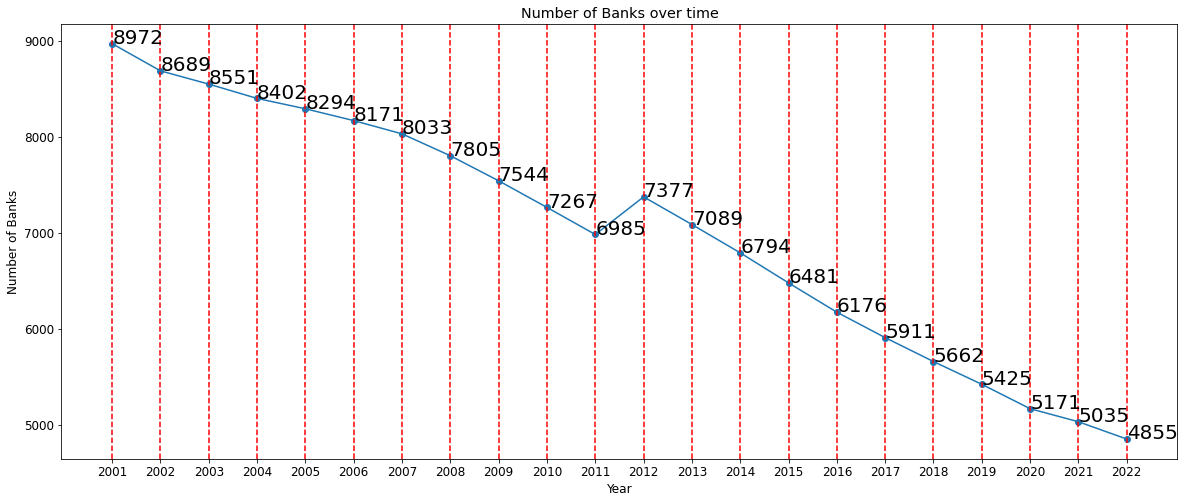

In [2]:
# numer of banks plot, create identifier by concatenating the first 10 columns
identifier = data[0].columns[2:11]
# numberOfBanks = [len(d[identifier].astype(str).agg('-'.join, axis=1).unique()) for d in data]
numberOfBanks = [len(d['IDRSSD'].unique()) for d in data]
plt.title("Number of Banks over time")
plt.plot(range(2001,2023), numberOfBanks, 'o-')
# show plot value on the plot
for x,y in zip(range(2001,2023), numberOfBanks):
    plt.text(x, y, str(y), fontsize=20)
plt.xlabel("Year")
plt.ylabel("Number of Banks")
# plot vertial line for every year  
for i in range(2001,2023):
    plt.axvline(x=i, color='r', linestyle='--')
# show all xticks
plt.xticks(range(2001,2023))
plt.show()

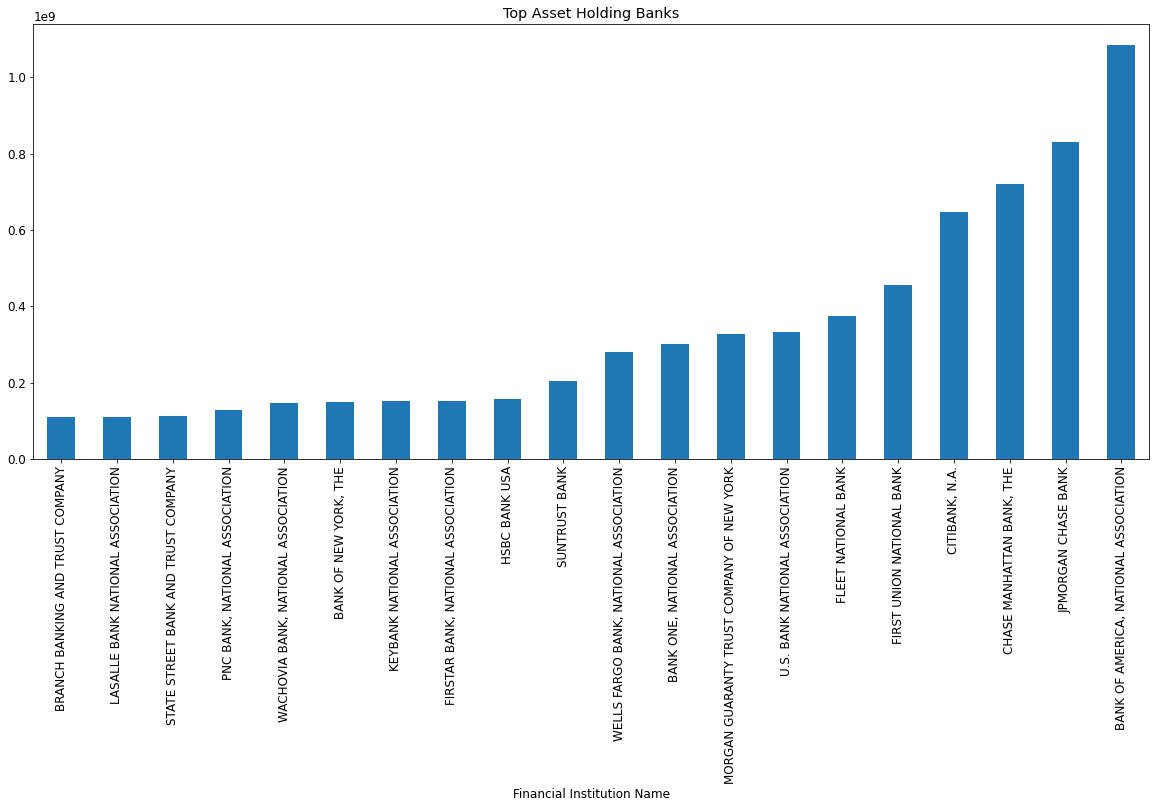

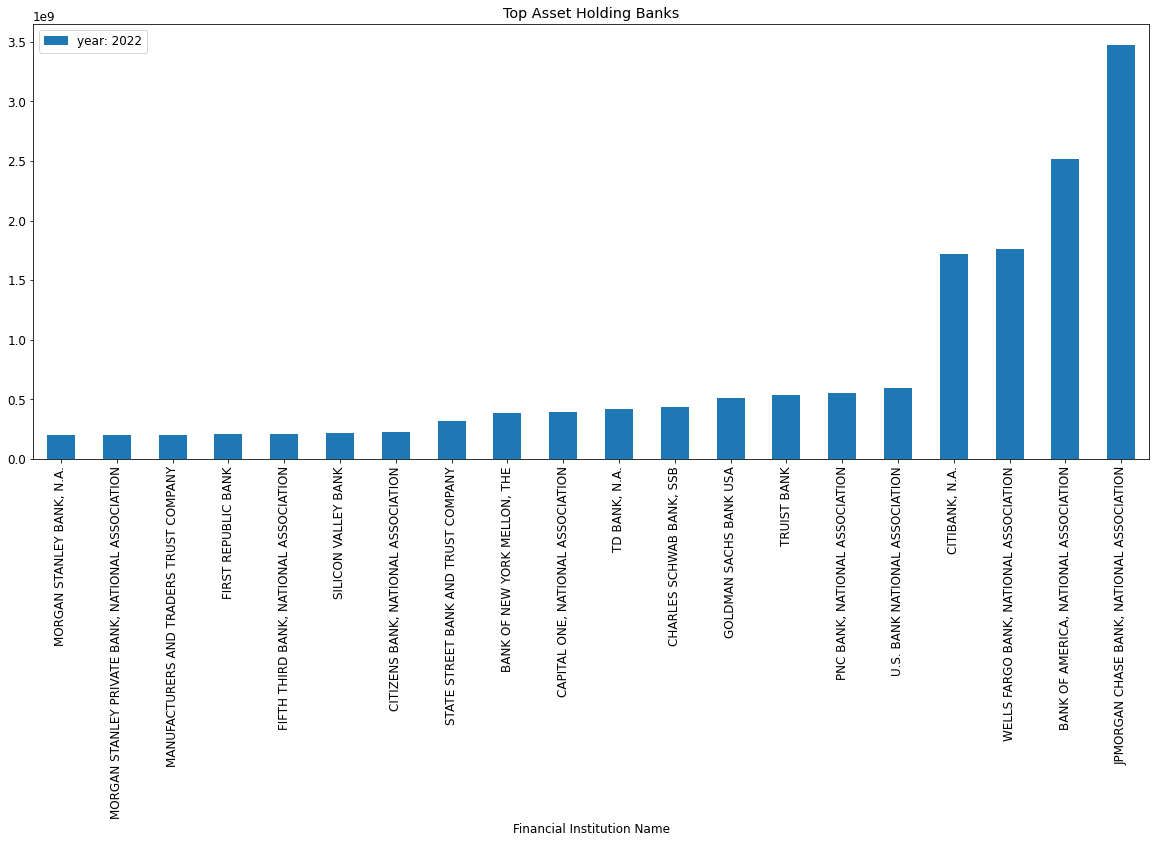

In [3]:
for year in [2001,2022]:
    plt.figure()
    plt.title("Top Asset Holding Banks")
    var, ddd = call(["TOTAL ASSETS",], year)
    assetValues = ddd.groupby("Financial Institution Name")[var].max().sort_values()[-20:].plot.bar(label=f"year: {year}")
plt.legend()

In [4]:
dfs = []
for year in [2001,2022]:
    var, ddd = call(["TOTAL ASSETS"], year)
    dfs.append(ddd.groupby("Financial Institution Name")[var].max().sort_values(ascending=False)[:20])
df = pd.concat([d.reset_index() for d in dfs], axis=1)
df.columns = ["Financial Institution Name", "2001 asset value", "Financial Institution Name", "2022 asset value"]
df

,Financial Institution Name,2001 asset value,Financial Institution Name,2022 asset value
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",1.084464e+09,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",3.476711e+09
1,JPMORGAN CHASE BANK,8.298440e+08,"BANK OF AMERICA, NATIONAL ASSOCIATION",2.513619e+09
2,"CHASE MANHATTAN BANK, THE",7.204700e+08,"WELLS FARGO BANK, NATIONAL ASSOCIATION",1.764272e+09
3,"CITIBANK, N.A.",6.469870e+08,"CITIBANK, N.A.",1.720308e+09
4,FIRST UNION NATIONAL BANK,4.549460e+08,U.S. BANK NATIONAL ASSOCIATION,5.912109e+08
5,FLEET NATIONAL BANK,3.750730e+08,"PNC BANK, NATIONAL ASSOCIATION",5.533952e+08
6,U.S. BANK NATIONAL ASSOCIATION,3.338981e+08,TRUIST BANK,5.341850e+08
7,MORGAN GUARANTY TRUST COMPANY OF NEW YORK,3.261370e+08,GOLDMAN SACHS BANK USA,5.139050e+08
8,"BANK ONE, NATIONAL ASSOCIATION",3.021459e+08,"CHARLES SCHWAB BANK, SSB",4.346270e+08
9,"WELLS FARGO BANK, NATIONAL ASSOCIATION",2.809890e+08,"TD BANK, N.A.",4.173584e+08


### Total Assets and Total Liability 

In [21]:
# overnight borrowing
overnightBorrowing = aggregateSumOverYears("FEDERAL FUNDS PURCHASED IN DOMESTIC OFFICES", 
                          "overnight", 
                          2002,
                          2022)

# short term borrowing
shortTermBorrowing = aggregateSumOverYears("SECURITIES PURCHASED UNDER AGREEMENTS TO RESELL", 
                          "shortTerm", 
                          2002,
                          2022)

# long term borrowing
longTermBorrowing= aggregateSumOverYears("OTHER BORROWED MONEY", 
                          "longTerm", 
                          2001,
                          2022)

# reserved cash
reservedCash = aggregateSumOverYears("UNDIVIDED PROFITS AND CAPITAL RESERVES", 
                          "cash", 
                          2001,
                          2022)

# fed funds rate 
fedRate = pd.read_csv("FEDFUNDS.csv")
fedRate["DATE"] = pd.to_datetime(fedRate["DATE"], format="%Y-%m-%d")
annualizedFedRate = fedRate.groupby(fedRate.DATE.dt.year).mean()

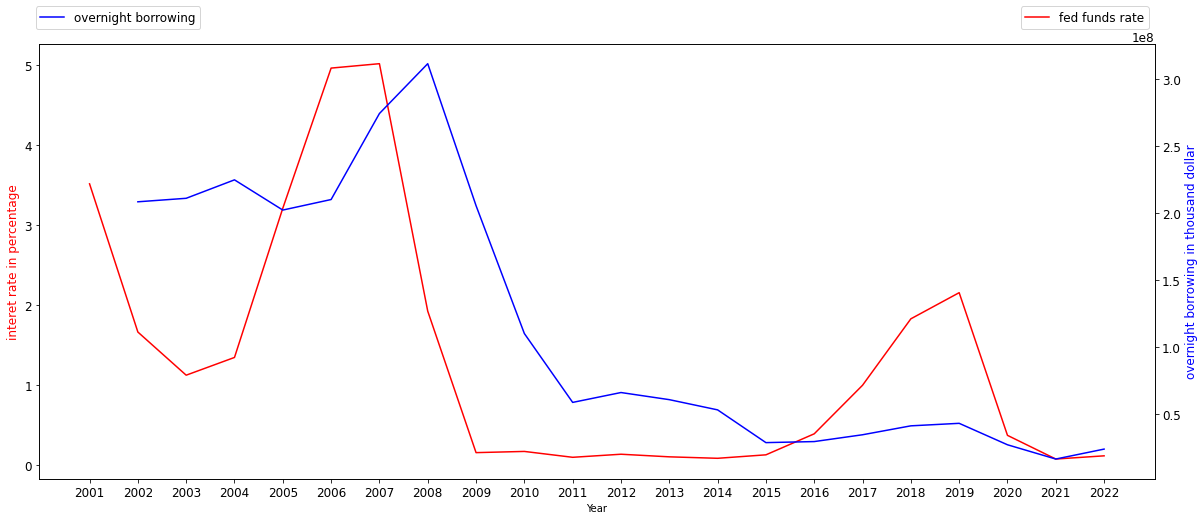

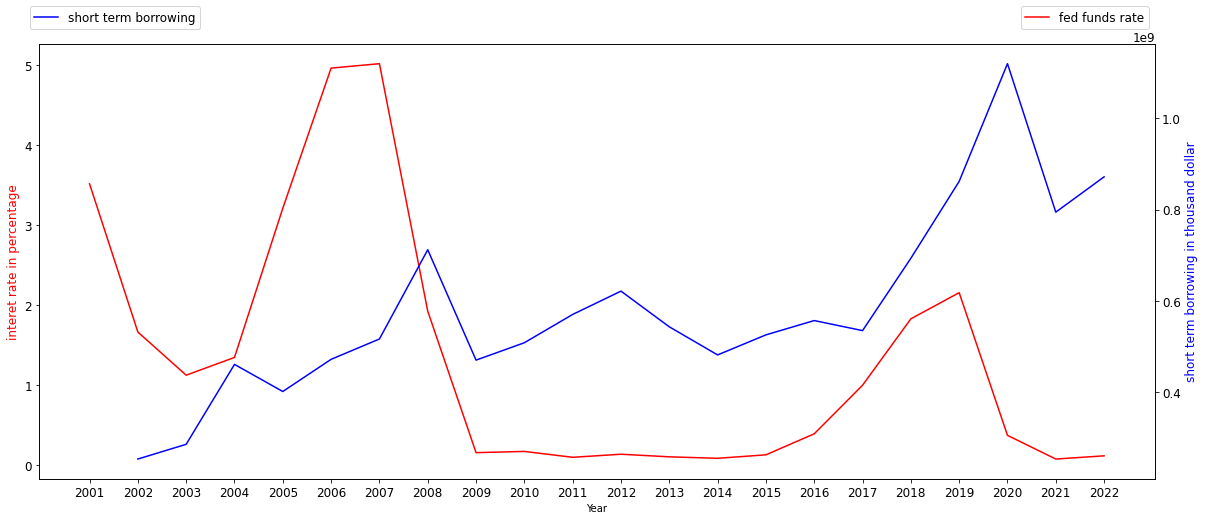

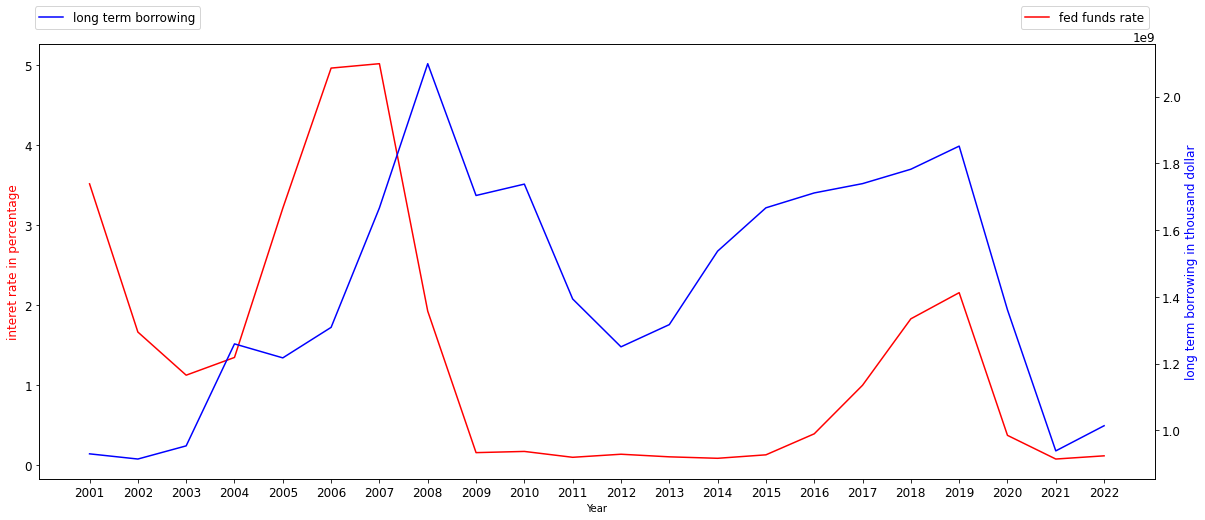

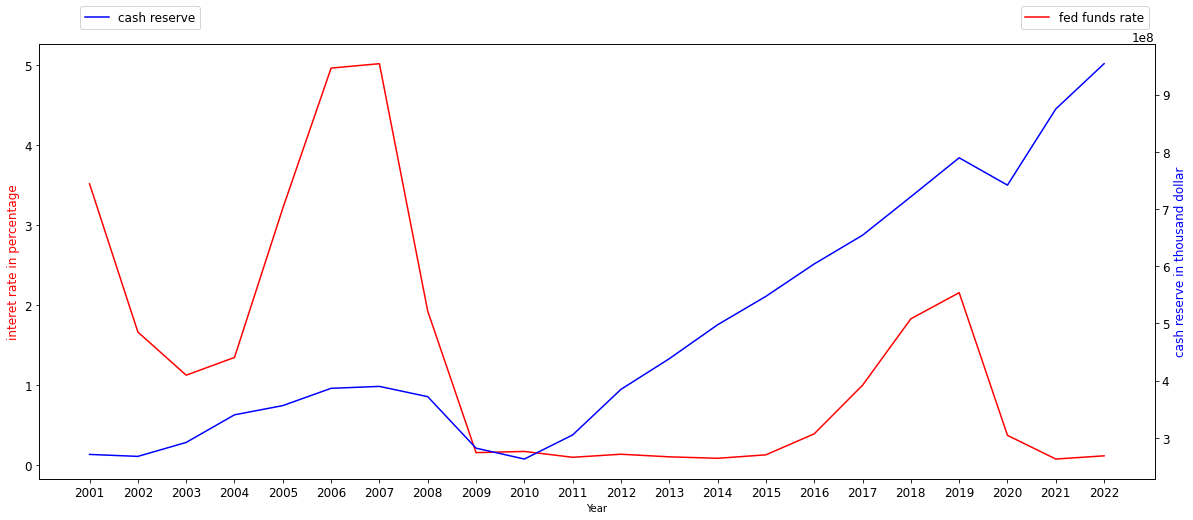

In [23]:
# fed rates and overnight borrowing overlay 
comparisonPlotsOverYears(annualizedFedRate, overnightBorrowing, 
                         label1 = "fed funds rate", 
                         label2 = "overnight borrowing", 
                         ylabel1 = "interet rate in percentage", 
                         ylabel2 = "overnight borrowing in thousand dollar")
# fed rates and short term borrowing overlay 
comparisonPlotsOverYears(annualizedFedRate, shortTermBorrowing,
                         label1="fed funds rate",
                         label2="short term borrowing",
                         ylabel1="interet rate in percentage",
                         ylabel2="short term borrowing in thousand dollar")
# fed rates and long term borrowing overlay 
comparisonPlotsOverYears(annualizedFedRate, longTermBorrowing,
                         label1="fed funds rate",
                         label2="long term borrowing",
                         ylabel1="interet rate in percentage",
                         ylabel2="long term borrowing in thousand dollar")
# fed rates and cash reserve overlay
comparisonPlotsOverYears(annualizedFedRate, reservedCash,
                         label1="fed funds rate",
                         label2="capital reserve",
                         ylabel1="interet rate in percentage",
                         ylabel2="cash reserve in thousand dollar")


In [7]:
# overnight lending
overnightLending = aggregateSumOverYears("FEDERAL FUNDS SOLD", 
                          "overnight", 
                          2002,
                          2022)

# short term lending
shortTermLending = aggregateSumOverYears("SECURITIES SOLD UNDER AGREEMENTS TO REPURCHASE", 
                          "shortTerm", 
                          2002,
                          2022)

# long term lending
keyWords = ["Loans to depository institutions"]
loansNames = searchVar(keyWords, varNamesOverYearsPlus, show=False)
longTermLending= aggregateSumOverYears(loansNames, 
                          "longTerm", 
                           2001,
                           2022)

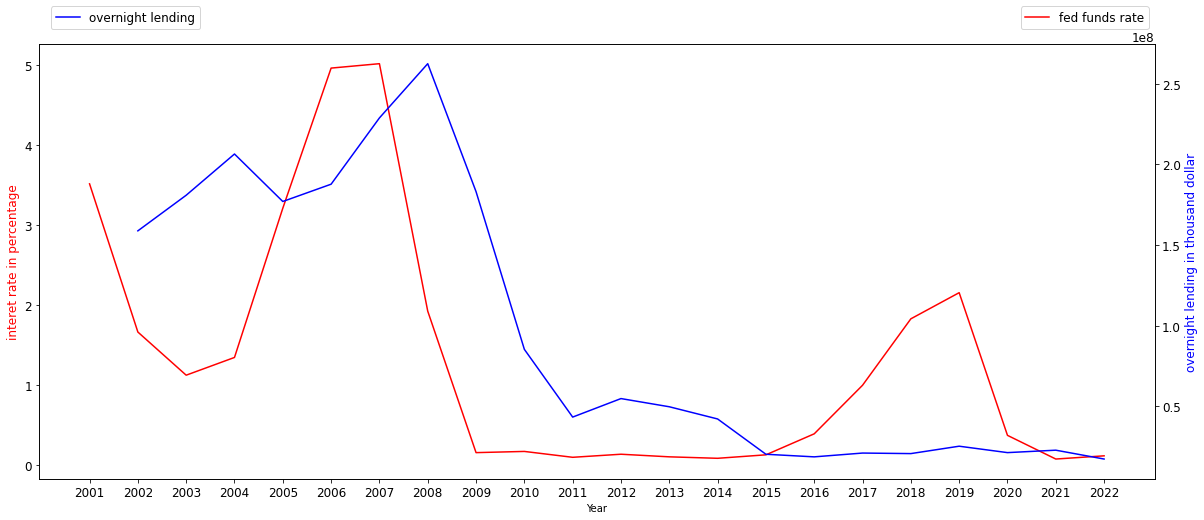

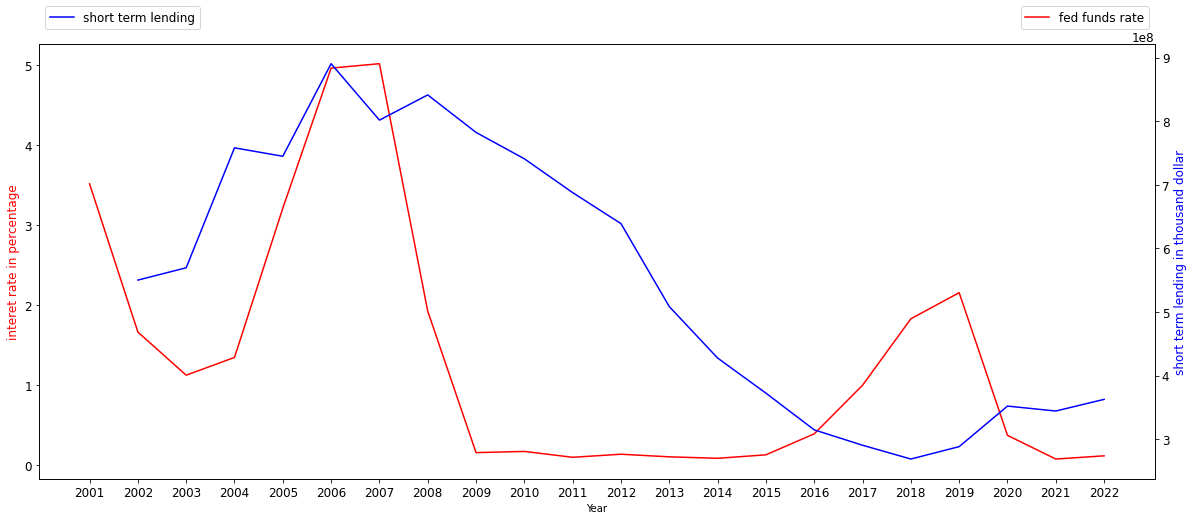

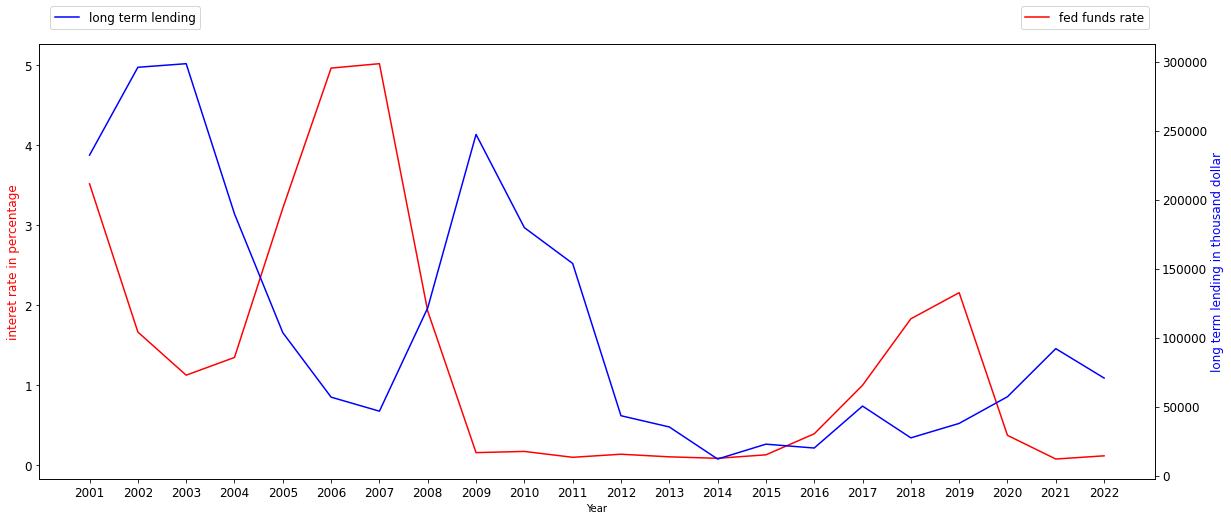

In [22]:
# fed rates and overnight lending overlay 
comparisonPlotsOverYears(annualizedFedRate, overnightLending, 
                         label1 = "fed funds rate", 
                         label2 = "overnight lending", 
                         ylabel1 = "interet rate in percentage", 
                         ylabel2 = "overnight lending in thousand dollar")
# fed rates and short term lending overlay 
comparisonPlotsOverYears(annualizedFedRate, shortTermLending,
                         label1="fed funds rate",
                         label2="short term lending",
                         ylabel1="interet rate in percentage",
                         ylabel2="short term lending in thousand dollar")
# fed rates and long term lending overlay 
comparisonPlotsOverYears(annualizedFedRate, longTermLending,
                         label1="fed funds rate",
                         label2="long term lending",
                         ylabel1="interet rate in percentage",
                         ylabel2="long term lending in thousand dollar")

### Investigate if the balance sheet is balance?

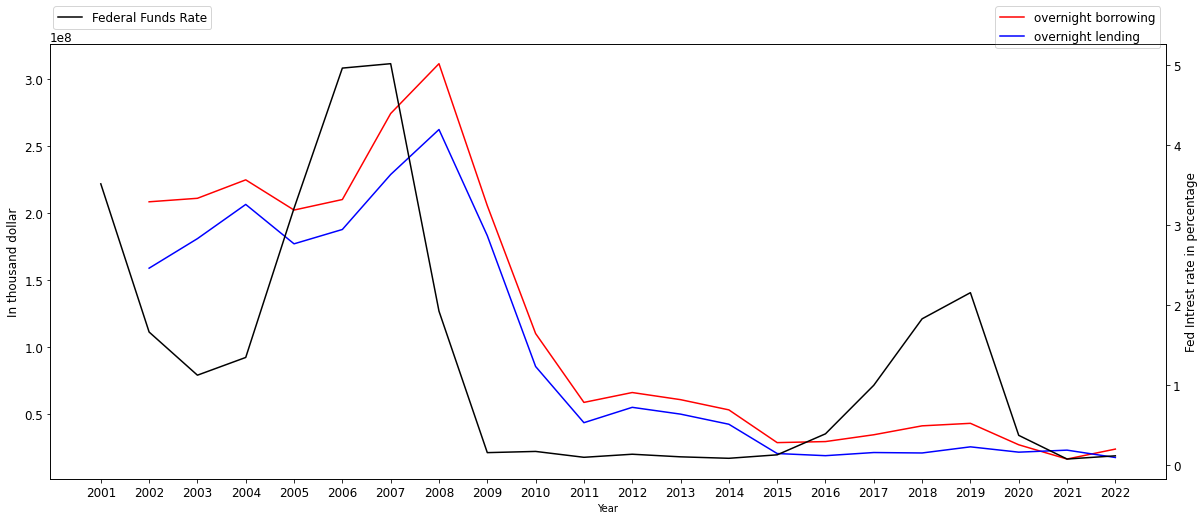

In [24]:
# overnight borrowing and overnight lending overlay
df1 = overnightBorrowing
df2 = overnightLending
label1="overnight borrowing"
label2="overnight lending"
ylabel1 = "In thousand dollar"
ylabel2 = "Fed Intrest rate in percentage"

fig, ax = plt.subplots()
ax.plot(df1.index, df1[df1.columns[0]],"r", label=label1)
ax.plot(df2.index, df2[df2.columns], 'b', label=label2)
ax.set_ylabel(ylabel1, color='k', fontsize=12)
ax.legend(bbox_to_anchor=(1, 1.1))
ax1 = ax.twinx()
ax.set_xlabel('Year', fontsize=10)
ax1.plot(annualizedFedRate.index, annualizedFedRate[annualizedFedRate.columns], 'k', label="Federal Funds Rate")
ax1.set_ylabel(ylabel2, color='k', fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1.1))
plt.xticks(range(2001,2023))
plt.show()

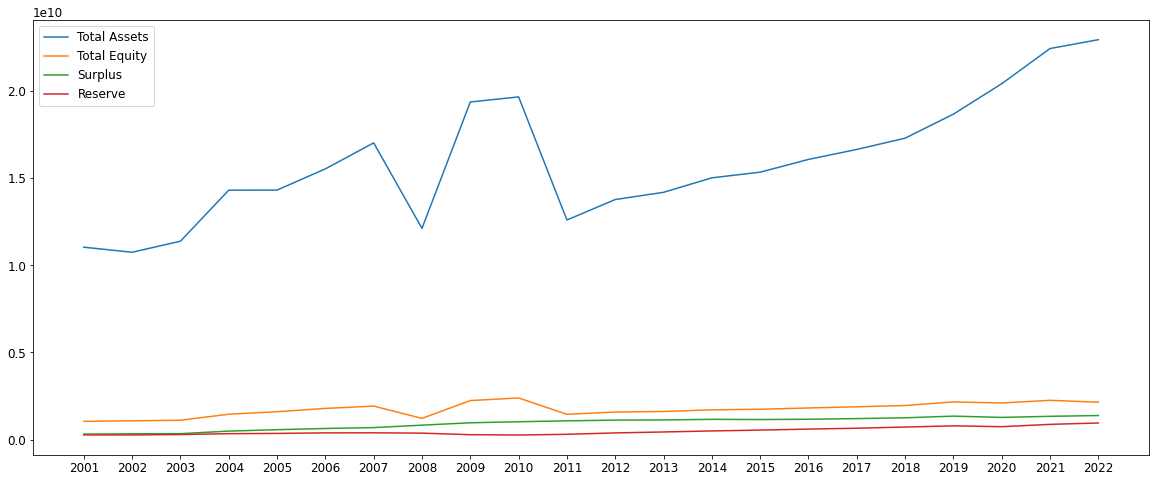

In [11]:
# total asset and total liability overlay
totalAssets = aggregateSumOverYears("TOTAL ASSETS", "total assets", 2001, 2022)
totalLiabilities = aggregateSumOverYears("TOTAL LIABILITIES AND MINORITY INTEREST", "total liabilities", 2001, 2022) 
totalSurplus = aggregateSumOverYears("SURPLUS", "surplus", 2001, 2022)
totalReserve = aggregateSumOverYears("UNDIVIDED PROFITS AND CAPITAL RESERVES", "reserve", 2001, 2022)


plt.plot(range(2001,2023), totalAssets, label="Total Assets")
# plt.plot(range(2001,2023), totalLiabilities, label="Total Liability")
plt.plot(range(2001,2023), totalAssets.values - totalLiabilities.values, label="Total Equity")
plt.plot(range(2001,2023), totalSurplus, label="Surplus")
plt.plot(range(2001,2023), totalReserve, label="Reserve")
plt.xticks(range(2001,2023))
plt.legend()

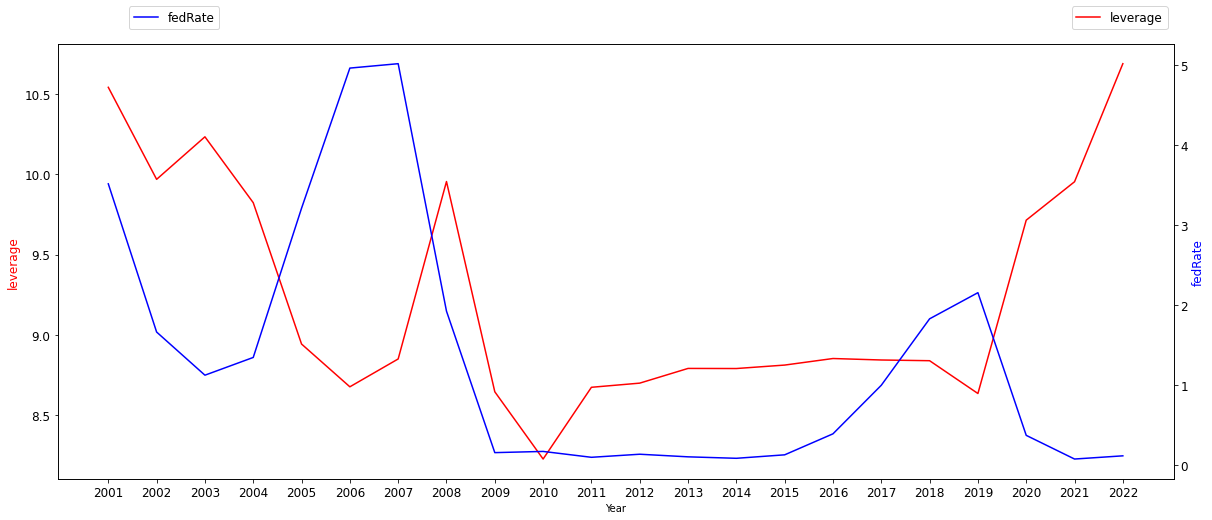

In [12]:
leverage = pd.DataFrame(columns=["leverage"], data = totalAssets.values / (totalAssets.values - totalLiabilities.values), index=totalAssets.index)

comparisonPlotsOverYears(leverage, annualizedFedRate,
                         label1="leverage",
                         label2="fedRate",
                         ylabel1="leverage",
                         ylabel2="fedRate")

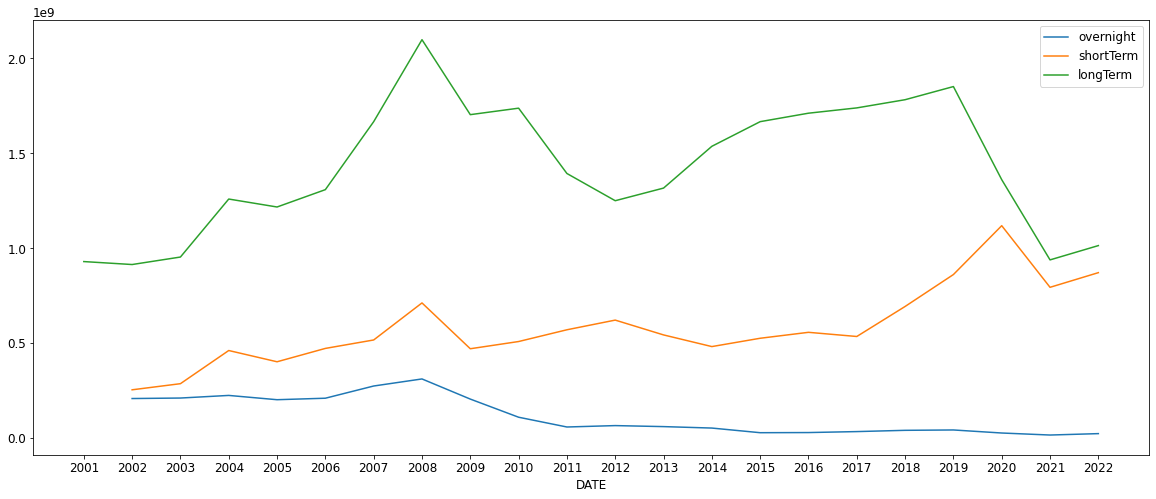

In [13]:
# Create a figure with 3 subplots
fig, axs = plt.subplots()
# Plot the data
overnightBorrowing.plot(ax = axs, label="overnight borrowing")
shortTermBorrowing.plot(ax = axs, label="short-term borrowing")
longTermBorrowing.plot(ax = axs, label="long-term borrowing")
plt.xticks(range(2001,2023))
plt.legend()